In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [6]:
df = pd.read_csv("co2_emissions.csv")
df.head()

,Model year,Make,Model,Vehicle class,Engine size,Cylinders,Transmission,Fuel type,City,Highway,Combined,Combined (mpg),CO2 emissions
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2020,Acura,MDX Hybrid AWD,Sport utility vehicle: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2020,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261


Text(0.5, 1.0, 'Distribution for CO₂ emissions')

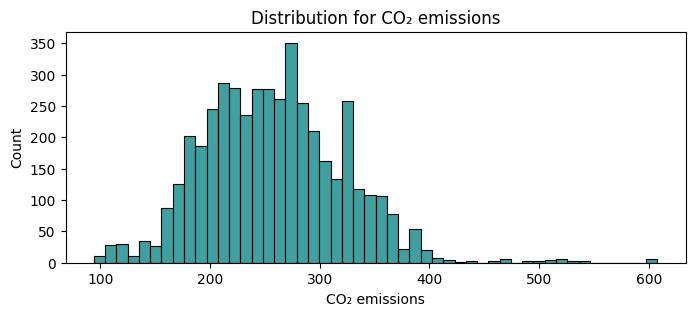

In [7]:
plt.figure(figsize=(8,3))
sns.histplot(df, x="CO2 emissions", color="teal")
plt.xlabel("CO₂ emissions")
plt.title("Distribution for CO₂ emissions")

In [24]:
# compact cars only
df_compact = df[df["Vehicle class"] == "Compact"]
# mid-size cars only
df_mid_size = df[df["Vehicle class"] == "Mid-size"]

# t-statistic and p-valu
test_results = stats.ttest_ind(df_compact["CO2 emissions"],
                               df_mid_size["CO2 emissions"],
                               equal_var=False, alternative="two-sided")

tstat = test_results[0]
pval = test_results[1]


In [25]:
print("The p-value is", pval, ", with a t-statistic of",round(tstat, 4))   

The p-value is 4.01440867666918e-05 , with a t-statistic of -4.127


<Figure size 640x480 with 0 Axes>

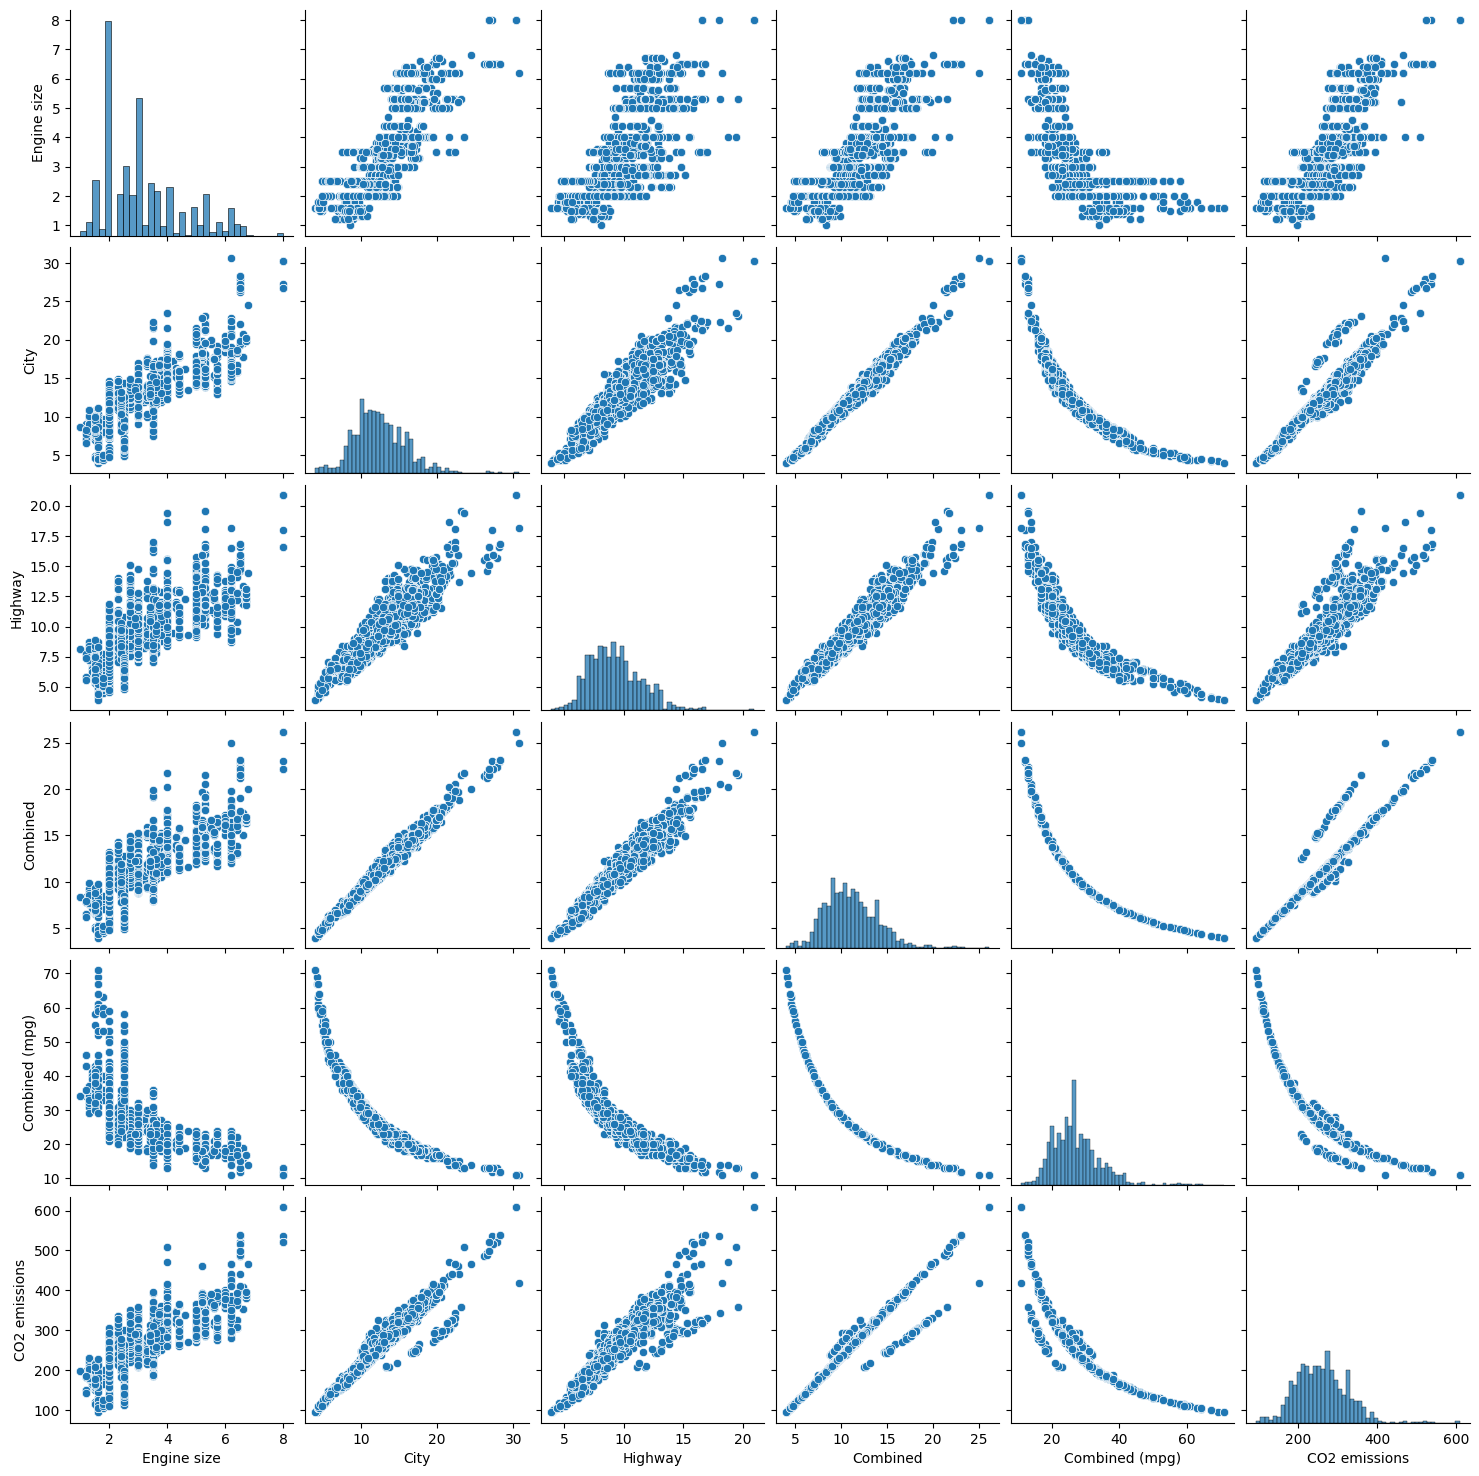

In [10]:
# identify the numeric (independent) feature
numeric_features = ["Engine size", "City", "Highway", 
                    "Combined", "Combined (mpg)", "CO2 emissions"]

plt.figure() 
axes = sns.pairplot(df[numeric_features])
plt.show()

In [26]:
correlation_matrix = df[["Engine size", "City", "Highway", 
                    "Combined", "Combined (mpg)", "CO2 emissions"]].corr()
    
correlation_matrix

,Engine size,City,Highway,Combined,Combined (mpg),CO2 emissions
Engine size,1.000000,0.828643,0.734967,0.810211,-0.701576,0.813010
City,0.828643,1.000000,0.921315,0.990335,-0.910812,0.962699
Highway,0.734967,0.921315,1.000000,0.966060,-0.879067,0.931323
Combined,0.810211,0.990335,0.966060,1.000000,-0.916312,0.969235
Combined (mpg),-0.701576,-0.910812,-0.879067,-0.916312,1.000000,-0.914270
CO2 emissions,0.813010,0.962699,0.931323,0.969235,-0.914270,1.000000


In [27]:
import statsmodels.api as sm

# predictors (Remember to add a constant term to the predictor)
X_simple = sm.add_constant(df["City"])
Y_simple = df["CO2 emissions"]

model_simple = sm.OLS(Y_simple, X_simple)
results_simple = model_simple.fit()

print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.731e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        13:37:41   Log-Likelihood:                -19341.
No. Observations:                4529   AIC:                         3.869e+04
Df Residuals:                    4527   BIC:                         3.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2213      0.963     37.609      0.0

In [28]:
predictors = ['City', 'Fuel type']
fuel_type_dummies = pd.get_dummies(df[['City','Fuel type']], columns=['Fuel type'], drop_first=True, dtype=int)

fuel_type_dummies.head()

,City,Fuel type_E,Fuel type_X,Fuel type_Z
0,9.9,0,0,1
1,12.3,0,0,1
2,12.2,0,0,1
3,9.1,0,0,1
4,11.1,0,0,1


In [31]:
# Added a constant term to fuel_type_dummies
X_multi = sm.add_constant(fuel_type_dummies)
Y_multi = df["CO2 emissions"]

model_multi = sm.OLS(Y_multi, X_multi)
results_multi = model_multi.fit()

print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.217e+04
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        13:38:29   Log-Likelihood:                -16537.
No. Observations:                4529   AIC:                         3.308e+04
Df Residuals:                    4524   BIC:                         3.312e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.3992      1.003     55.233      

In [22]:
# load the test data
test_df = pd.read_csv("test_cars.csv")

# prepare the predictors for the first model
predictors = ["City", "Fuel type"]
# create the dummy variables for "Fuel type"
fuel_type_dummies_test = pd.get_dummies(test_df[predictors], columns=["Fuel type"], drop_first=True, dtype=int)
# if not all fuel types are present in the test data, add the missing columns
fuel_type_dummies_test = fuel_type_dummies_test.reindex(
    columns=fuel_type_dummies.columns, fill_value=0)

# get the predictor columns from X_multi.
X_test_multi = sm.add_constant(fuel_type_dummies_test)

# Predict the CO2 emissions using the second model
predictions_test_multi = results_multi.predict(X_test_multi)

In [23]:
print("\nPredictions using the selected model:")
for i in range(len(predictions_test_multi)):
    print(test_df["Model year"][i], test_df["Make"][i], test_df["Model"][i], ":", predictions_test_multi[i])


Predictions using the selected model:
2023 Kia Forte : 213.25202144513094
2024 Nissan Sentra : 197.85175031754164
2023 Honda Accord : 161.85361655680163
2024 Genesis G70 : 241.67789789377838
